<a href="https://colab.research.google.com/github/Gladn/Colaboratory_new/blob/main/Hugrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install datasets transformers[sentencepiece]

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_datasets
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
!wget https://sc.link/zlGy -o test.zip

In [ ]:
!unzip subsample -d /content/test/

In [ ]:
batch_size=128
image_size=(200, 200)

In [ ]:
trainDataset = image_dataset_from_directory('/content/subsample/',
                                     subset = 'training',
                                     seed = 42,
                                     validation_split = 0.1,
                                     batch_size = batch_size,
                                     image_size= image_size)

Found 1801 files belonging to 18 classes.
Using 1621 files for training.


In [ ]:
validation_dataset = image_dataset_from_directory('/content/subsample/',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 1801 files belonging to 18 classes.
Using 180 files for validation.


In [ ]:
testDataset = image_dataset_from_directory('/content/subsample/',
                                     batch_size = batch_size,
                                     image_size= image_size)

Found 1801 files belonging to 18 classes.


In [ ]:
class_names = trainDataset.class_names

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in trainDataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = trainDataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = testDataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same',
                 input_shape=(200, 200, 3), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 131 нейрон по количеству классов
model.add(Dense(131, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=2)

Epoch 1/5
13/13 - 156s - loss: 23.5317 - accuracy: 0.0432 - val_loss: 3.4024 - val_accuracy: 0.0333 - 156s/epoch - 12s/step
Epoch 2/5
13/13 - 141s - loss: 3.3200 - accuracy: 0.0506 - val_loss: 3.1034 - val_accuracy: 0.0500 - 141s/epoch - 11s/step
Epoch 3/5
13/13 - 149s - loss: 3.1675 - accuracy: 0.0537 - val_loss: 2.9888 - val_accuracy: 0.0389 - 149s/epoch - 11s/step
Epoch 4/5
13/13 - 147s - loss: 3.0968 - accuracy: 0.0580 - val_loss: 3.0149 - val_accuracy: 0.0444 - 147s/epoch - 11s/step
Epoch 5/5
13/13 - 155s - loss: 3.0111 - accuracy: 0.0771 - val_loss: 3.0596 - val_accuracy: 0.0611 - 155s/epoch - 12s/step


In [ ]:
scores = model.evaluate(test_dataset, verbose=1)

15/15 [==============================] - 61s 3s/step - loss: 2.9260 - accuracy: 0.1394


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 13.9367


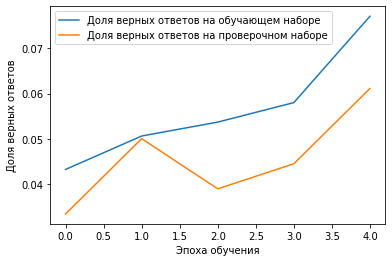

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()